# Summary
In this notebook we experimenting some changes in the upstream training pipeline. 
- **Stop normalization inside the dataloader**: The downstream samples are normalized over 450 timestamps. We change the process such that the normalization would take place only *after* we take 450 consecutive timestemps from the signal.  
- **Add resampling**: In the training loop, we resample the signals from 500Hz into 200Hz. Also, *outside* of the `DataLoader` object, inside the training loop.


## Load Data

In [1]:
import os
os.chdir('/Users/davidharar/Documents/School/thesis/upstream_seq2seq/')

from utils.signal_processing import *

In [16]:
# --------------------------------
# Usage example
# --------------------------------

import pickle
from dataloader.DataLoader import DataGenerator_12leads
import numpy as np

DESTINATION_FOLDER = './data/processed/'
BATCH_SIZE = 4
with open(DESTINATION_FOLDER+"splits.pkl", 'rb') as handle:
    splits = pickle.load(handle)

train_generator = DataGenerator_12leads(
                                data_folder_path=DESTINATION_FOLDER, # path to relevant folder
                                batch_size=BATCH_SIZE,                        # batch size
                                list_IDs=splits['train'],            # list of relevat IDs (each ID is given in a <file>_<person> format)
                                shuffle = True                       # Whether to shuffle the list of IDs at the end of each epoch.
                                )

X1,X2 = train_generator.__getitem__(0)
print(X1.shape, X2.shape, np.mean(X1==X2))
X1, X2

(4, 12, 5000) (4, 12, 5000) 1.0


(array([[[   0,   10,  -15, ...,   20,   20,   10],
         [   5,    5,  -34, ...,    5,   15,    5],
         [   5,   -5,  -20, ...,  -15,   -5,   -5],
         ...,
         [ -44,  -44,  -39, ...,    5,    5,   10],
         [ -29,  -24,  -20, ...,   15,   20,   20],
         [  83,   83,   83, ...,   10,   15,   15]],
 
        [[ -59,  -59,  -59, ...,   54,   59,   59],
         [ -68,  -68,  -68, ...,  146,  146,  156],
         [ -10,  -10,  -10, ...,   93,   88,   98],
         ...,
         [ -88,  -88,  -88, ..., -395, -390, -390],
         [ -88,  -88,  -88, ...,  161,  166,  171],
         [-185, -185, -185, ..., -268, -264, -264]],
 
        [[  59,   59,   59, ..., -117,  -59,  -83],
         [  78,   78,   78, ...,  -98,  -68,  -29],
         [  20,   20,   20, ...,   20,  -10,   54],
         ...,
         [ 468,  468,  468, ..., -298, -293, -293],
         [ 429,  429,  429, ..., -410, -400, -405],
         [ -39,  -39,  -39, ..., -254, -239, -249]],
 
        [[ -2

(4, 12, 5000)->(4, 12, 450)
(4, 12, 5000)->(4, 12, 450)


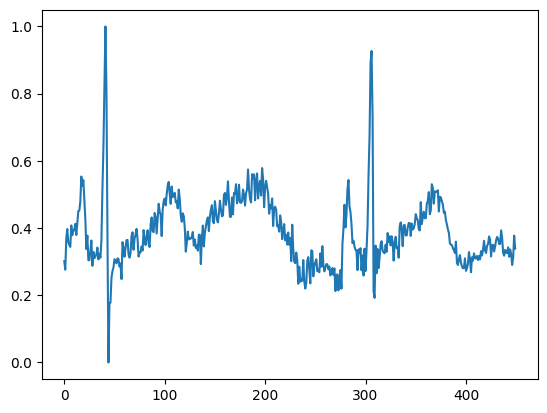

In [17]:
a,b = X1.shape, X2.shape

X1 = resample(X1)
X2 = resample(X2)

X1, X2 = sample(X1, X2, window=450)

X1 = normalize(X1)
X2 = normalize(X2)

print(f'{a}->{X1.shape}')
print(f'{b}->{X2.shape}')

import matplotlib.pyplot as plt
plt.plot(X1[0][0])


# Checking Data Curroptor

In [18]:
from utils import DataCorruptor
data_corruptor = DataCorruptor.DataCorruptor('./data/processed/')


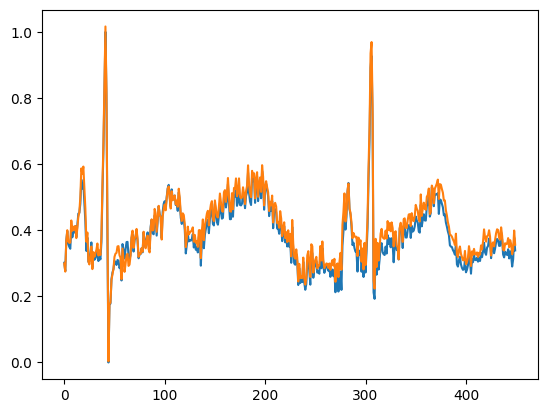

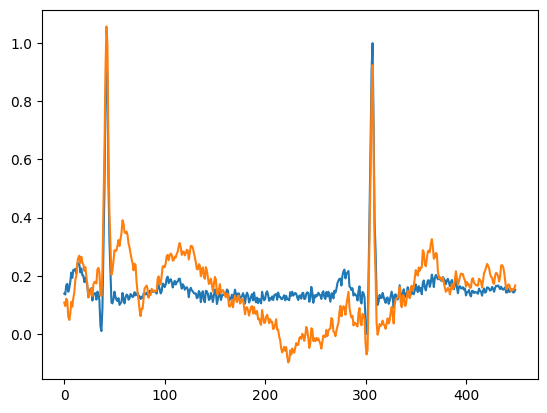

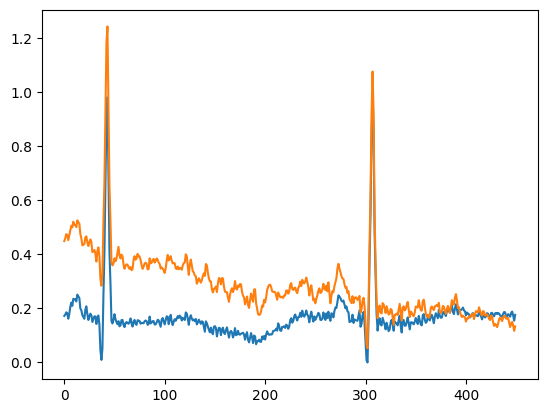

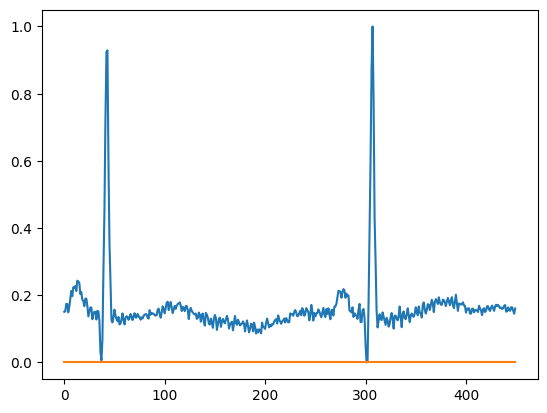

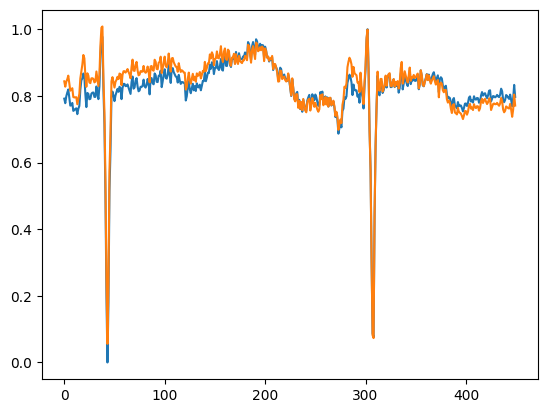

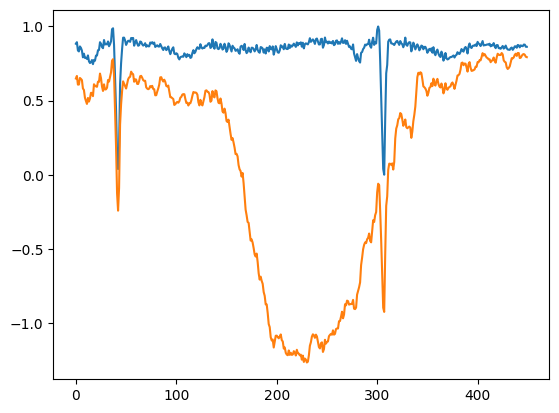

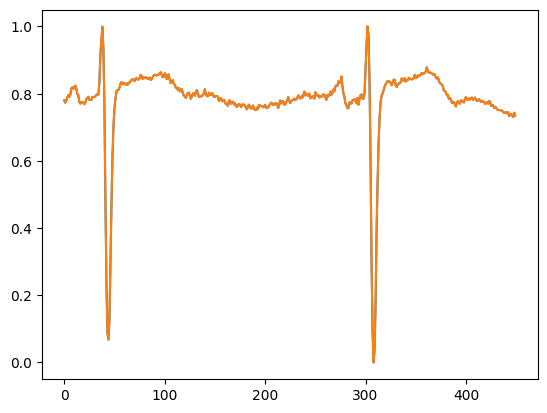

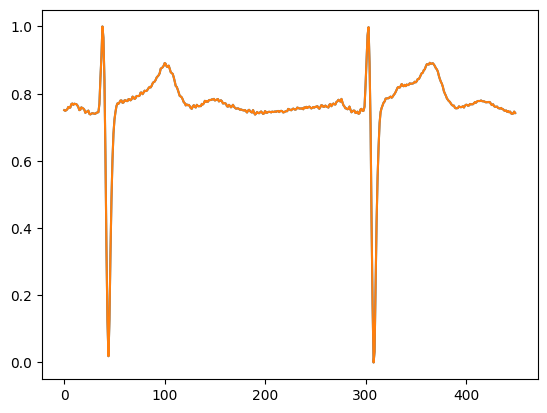

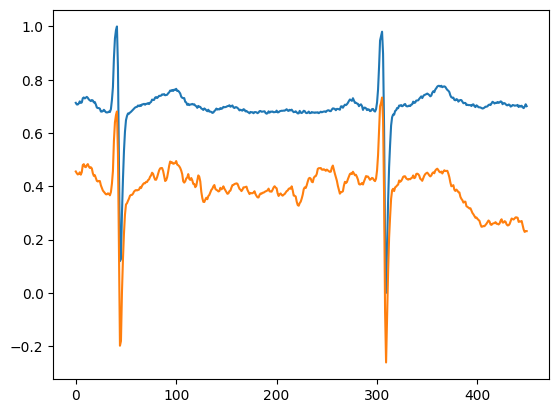

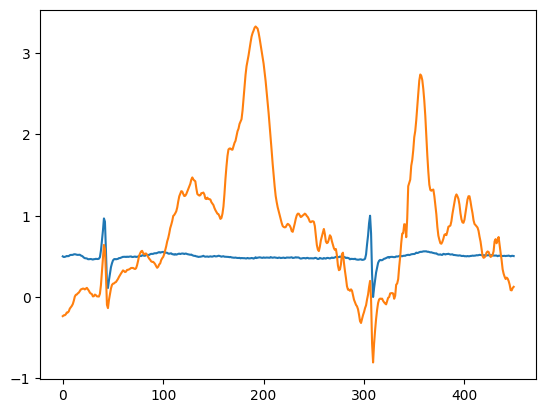

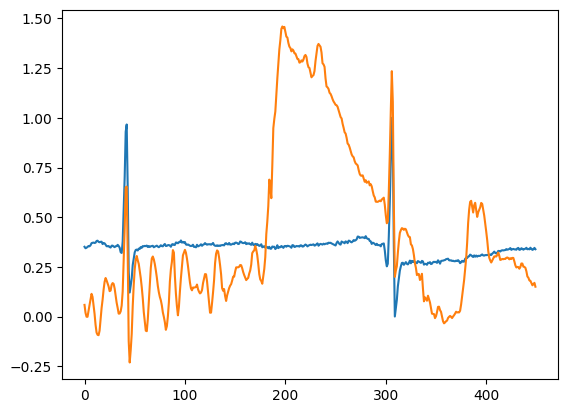

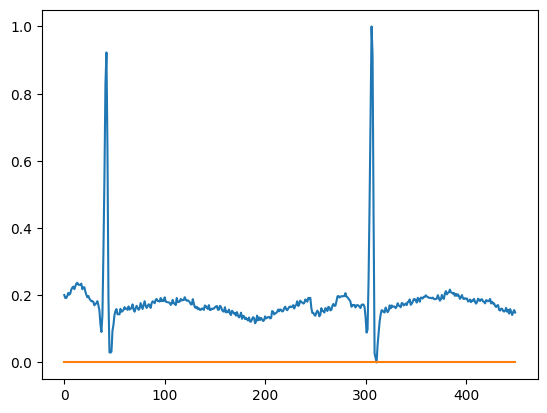

In [19]:
# ??data_corruptor.corrupt_a_batch
X1_corrupted = data_corruptor.corrupt_a_batch(X1)

for j in range(12):
    plt.plot(X1[0][j])
    plt.plot(X1_corrupted[0][j])
    plt.show()

# Going through training

In [22]:
import pickle
from dataloader.DataLoader import DataGenerator_12leads
import numpy as np

DESTINATION_FOLDER = './data/processed/'
BATCH_SIZE = 4
with open(DESTINATION_FOLDER+"splits.pkl", 'rb') as handle:
    splits = pickle.load(handle)

train_generator = DataGenerator_12leads(
                                data_folder_path=DESTINATION_FOLDER, # path to relevant folder
                                batch_size=BATCH_SIZE,                        # batch size
                                list_IDs=splits['train'],            # list of relevat IDs (each ID is given in a <file>_<person> format)
                                shuffle = True                       # Whether to shuffle the list of IDs at the end of each epoch.
                                )


src,trg = train_generator.__getitem__(0)
src

array([[[   0,   10,  -15, ...,   20,   20,   10],
        [   5,    5,  -34, ...,    5,   15,    5],
        [   5,   -5,  -20, ...,  -15,   -5,   -5],
        ...,
        [ -44,  -44,  -39, ...,    5,    5,   10],
        [ -29,  -24,  -20, ...,   15,   20,   20],
        [  83,   83,   83, ...,   10,   15,   15]],

       [[ -59,  -59,  -59, ...,   54,   59,   59],
        [ -68,  -68,  -68, ...,  146,  146,  156],
        [ -10,  -10,  -10, ...,   93,   88,   98],
        ...,
        [ -88,  -88,  -88, ..., -395, -390, -390],
        [ -88,  -88,  -88, ...,  161,  166,  171],
        [-185, -185, -185, ..., -268, -264, -264]],

       [[  59,   59,   59, ..., -117,  -59,  -83],
        [  78,   78,   78, ...,  -98,  -68,  -29],
        [  20,   20,   20, ...,   20,  -10,   54],
        ...,
        [ 468,  468,  468, ..., -298, -293, -293],
        [ 429,  429,  429, ..., -410, -400, -405],
        [ -39,  -39,  -39, ..., -254, -239, -249]],

       [[ -22,  -20,  -20, ...,  -54,